# Estudo de Caso - Venda de Casas em King County, USA

## 0. Programação das Etapas

- Carregar os Dados e Inspecionar 
- Verificar a Validação e Consistência dos Dados
- Realizar a Limpeza e Transformação dos Dados
- Realizar a EDA (Análise Exploratória dos Dados)

# 1. Apresentação do Case

<br>
<img src="https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F1139584112%2F0x0.jpg" width="950" />
<br>

Nosso dataset foi obtido no site do Kaggle e pode ser acessado em:

Fonte: https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv


Trata-se dos dados de vendas de casas, no período entre Maio-2014 a Maio-2015, no condado de King, condado este que inclui a cidade de Seattle.

  
Features:

- **id** - Identification
- **date** - Date sold
- **price** - Sale price
- **bedrooms** - Number of bedrooms
- **bathrooms** - Number of bathrooms
- **sqft_living** - Size of living area in square feet
- **sqft_lot** - Size of the lot in square feet
- **floors** - Number of floors
- **waterfront** - ‘1’ if the property has a waterfront, ‘0’ if not.
- **view** - An index from 0 to 4 of how good the view of the property was
- **condition** - Condition of the house, ranked from 1 to 5
- **grade** - Classification by construction quality which refers to the types of materials used and the quality of workmanship.               Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 
- **sqft_above** - Square feet above ground
- **sqft_basmt** - Square feet below ground
- **yr_built** - Year built
- **yr_renov** - Year renovated. ‘0’ if never renovated
- **zipcode** - 5 digit zip code
- **lat** - Latitude
- **long** - Longitude
- **squft_liv15** - Average size of interior housing living space for the closest 15 houses, in square feet
- **squft_lot15** - Average size of land lots for the closest 15 houses, in square feet

O dicionário dos dados foi obtido em https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/ 

--------------

# 2. Bibliotecas e configurações iniciais

In [1]:
# Bibliotecas 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 3. Carregamento do dataset

In [2]:
# Leitura do arquivo

df_houses = pd.read_csv(r'./dataset/kc_house_data.csv')

# 4. Validação e Consistência dos Dados

In [3]:
df_houses.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

In [4]:
# Verificamos a nomenclatura das features se batem com o dicionário de dados disponível
df_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Verificamos o tamanho do dataset
df_houses.shape

(21613, 21)

In [6]:
# Verificamos os tipos de dados das features e se estas fazem sentido
df_houses.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Verificamos os valores únicos de floor
df_houses['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [8]:
# Verificamos a análise descritiva das features (contagem, média, desvio padrão, mínimo, máximo e quartis)
df_houses.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [9]:
# Checando valores únicos nas variáveis
list_unique_check = ['waterfront', 'condition', 'zipcode']

for col in list_unique_check:
    unique_values = df_houses[col].unique()
    print(unique_values)

[0 1]
[3 5 4 1 2]
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


In [10]:
# Verificamos se há linhas duplicadas
df_houses.duplicated().sum()

0

In [11]:
# Verificamos se há colunas duplicadas
df_houses.T.duplicated().sum()

0

In [12]:
# Verificamos valores nulos/faltantes
df_houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 5. Limpeza e Transformação dos Dados

In [13]:
# Vamos converter 'date' de object (string) para formato de data 

df_houses['date'] = pd.to_datetime(df_houses['date'], dayfirst = False)

In [14]:
df_houses

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1          7242     2.0           0     0  ...      7        2170   
2         10000     1.0           0     0  ...      6         770   
3          5000     1.0           0     0  ...      7        1050   
4          8080     1.0           0     0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21608      1131     3.0           0     0  ...      8        1530   
21609      5813     2.0           0     0  ...      8        2310   
21610      1350     2.0           0     0  ...      7        1020   
21611      2388     2.0           0     0  ...      8        1600   
21612      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 21 columns]

In [15]:
# Convertemos 'floors' para categórica
df_houses['floors'] = df_houses['floors'].astype('object')

In [16]:
df_houses

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot floors  waterfront  view  ...  grade  sqft_above  \
0          5650    1.0           0     0  ...      7        1180   
1          7242    2.0           0     0  ...      7        2170   
2         10000    1.0           0     0  ...      6         770   
3          5000    1.0           0     0  ...      7        1050   
4          8080    1.0           0     0  ...      8        1680   
...         ...    ...         ...   ...  ...    ...         ...   
21608      1131    3.0           0     0  ...      8        1530   
21609      5813    2.0           0     0  ...      8        2310   
21610      1350    2.0           0     0  ...      7        1020   
21611      2388    2.0           0     0  ...      8        1600   
21612      1076    2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 21 columns]

# 6. Análise Exploratória de Dados (EDA)

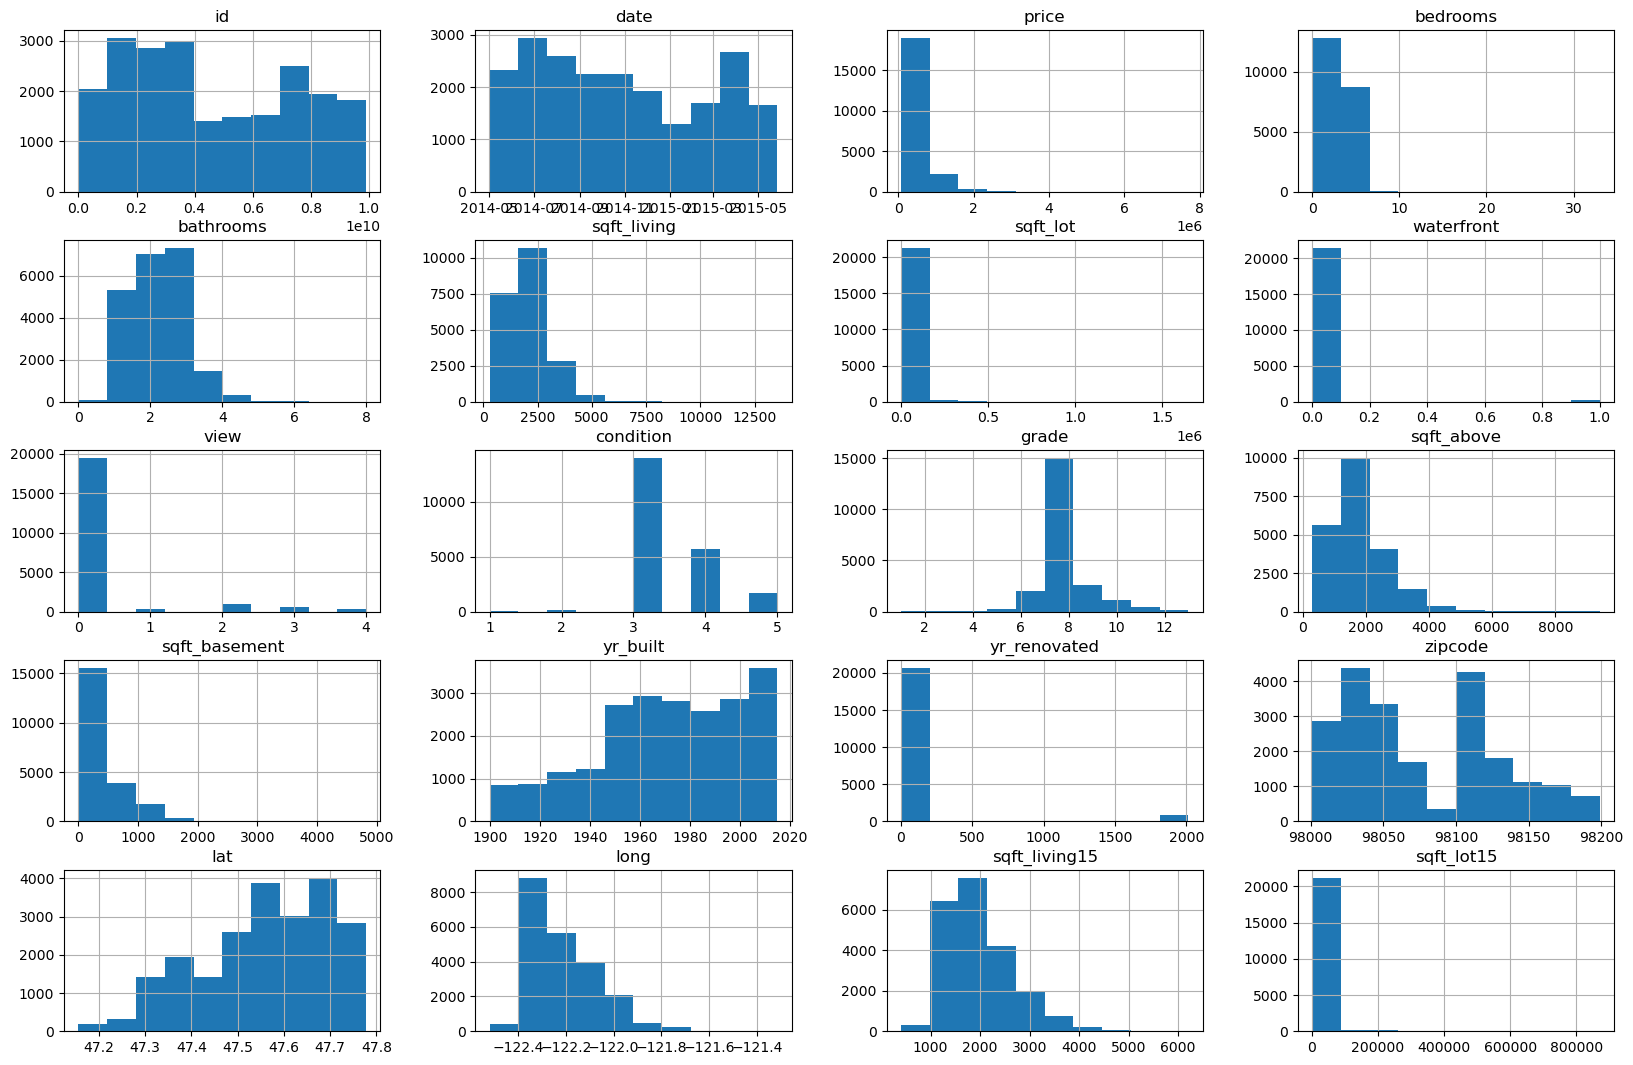

In [17]:
# Estudo das distribuições das variáveis
df_houses.hist(figsize=(20,13))
plt.show()

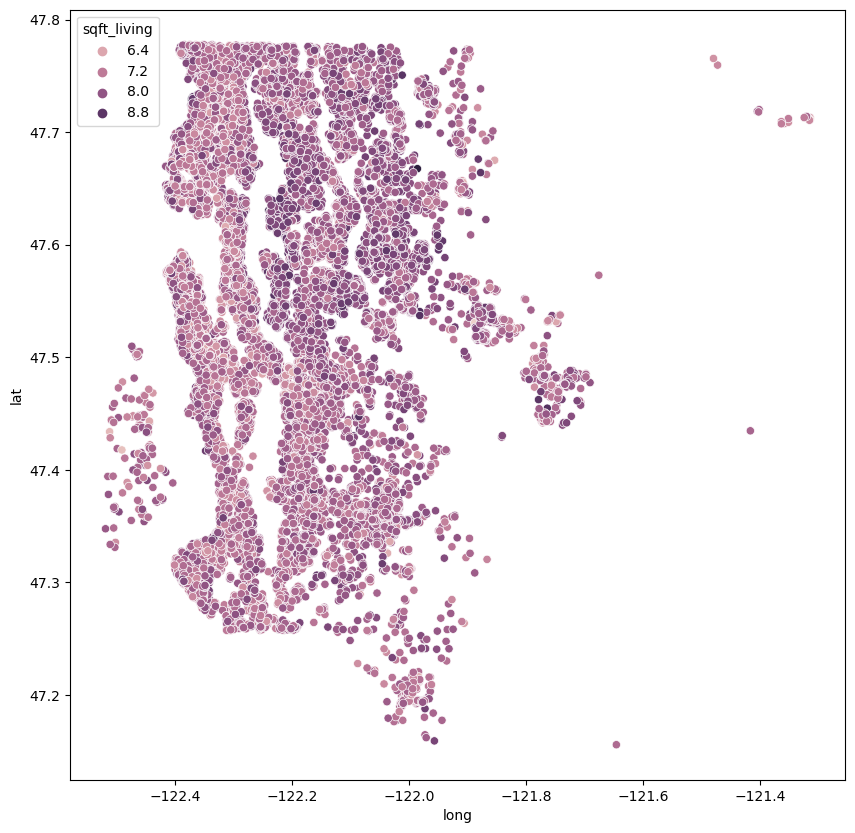

In [18]:
# Distribuição geográfica das casas conforme o tamanho (em logaritmo)
plt.figure(figsize=(10,10))
sns.scatterplot(x = df_houses['long'], y = df_houses['lat'], 
                hue=np.log(df_houses['sqft_living']));
plt.show()

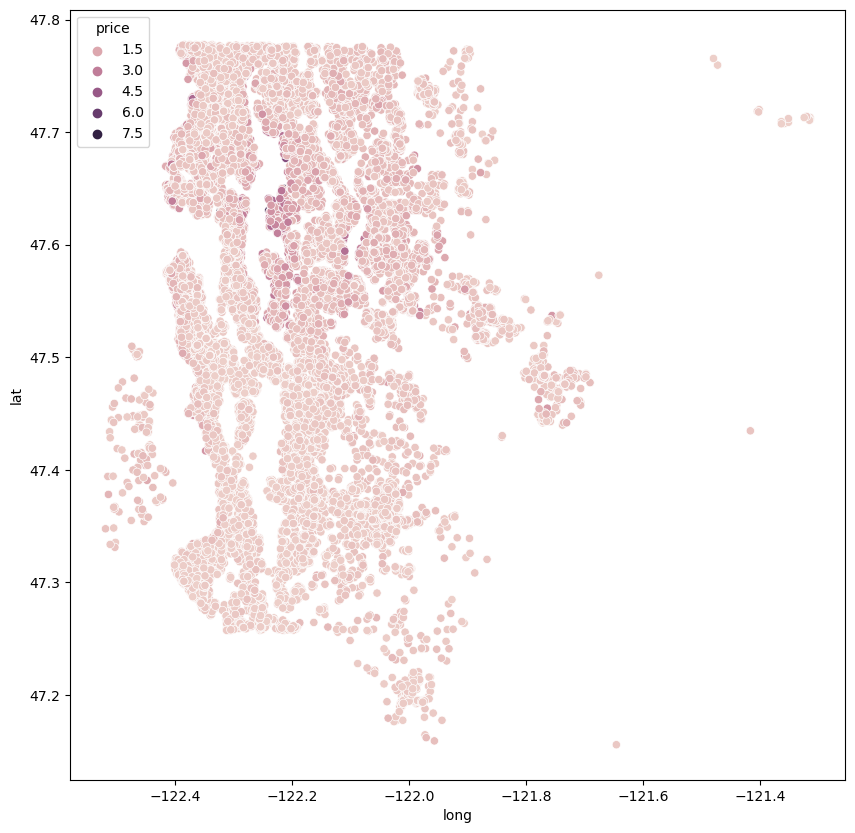

In [19]:
# Distribuição geográfica das casas conforme o preço de venda
plt.figure(figsize=(10,10))
sns.scatterplot(x = df_houses['long'], y = df_houses['lat'], 
                hue=df_houses['price']);
plt.show()

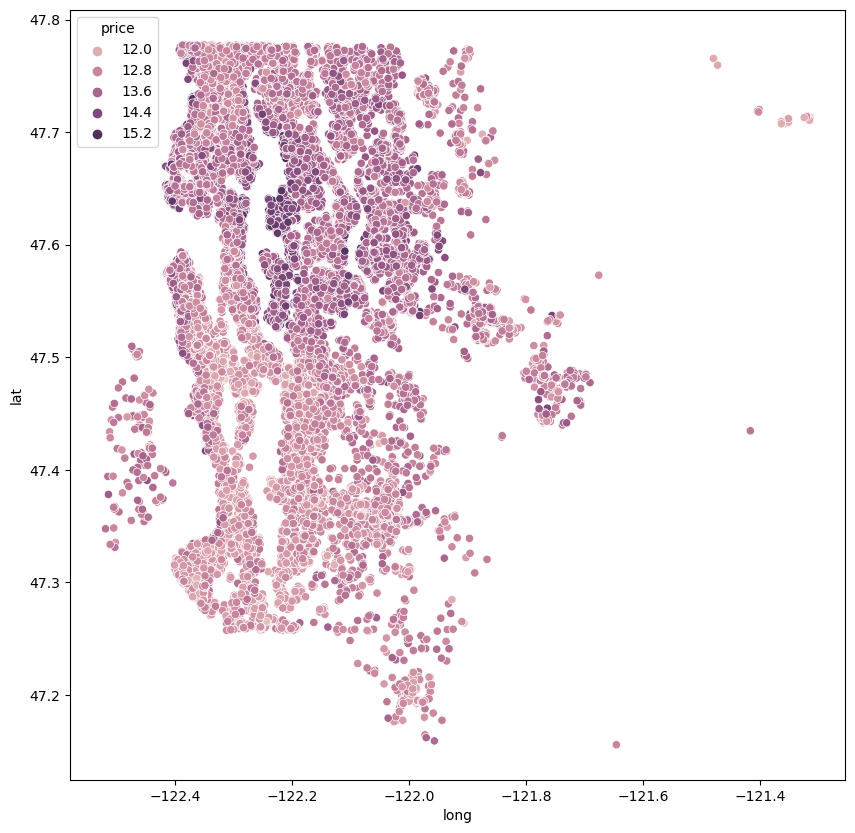

In [20]:
# Distribuição geográfica das casas conforme o logaritmo do preço de venda
plt.figure(figsize=(10,10))
sns.scatterplot(x = df_houses['long'], y = df_houses['lat'], 
                hue=np.log(df_houses['price']));
plt.show()

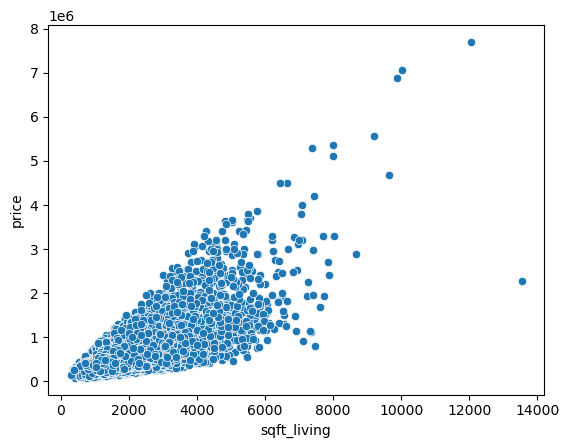

In [21]:
# Distribuição das casas conforme o tamanho versus o preço de venda
sns.scatterplot(x = df_houses['sqft_living'] , y = df_houses['price'])
plt.show()

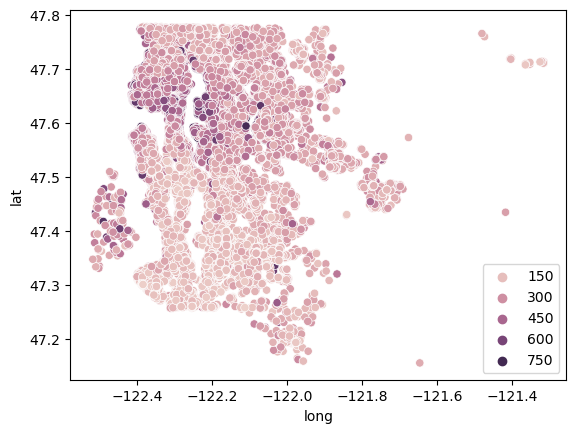

In [22]:
# Distribuição geográfica das casas conforme o preço por metro quadrado
sns.scatterplot(x= df_houses['long'], y=df_houses['lat'], hue = (df_houses['price']/df_houses['sqft_living']))
plt.show()

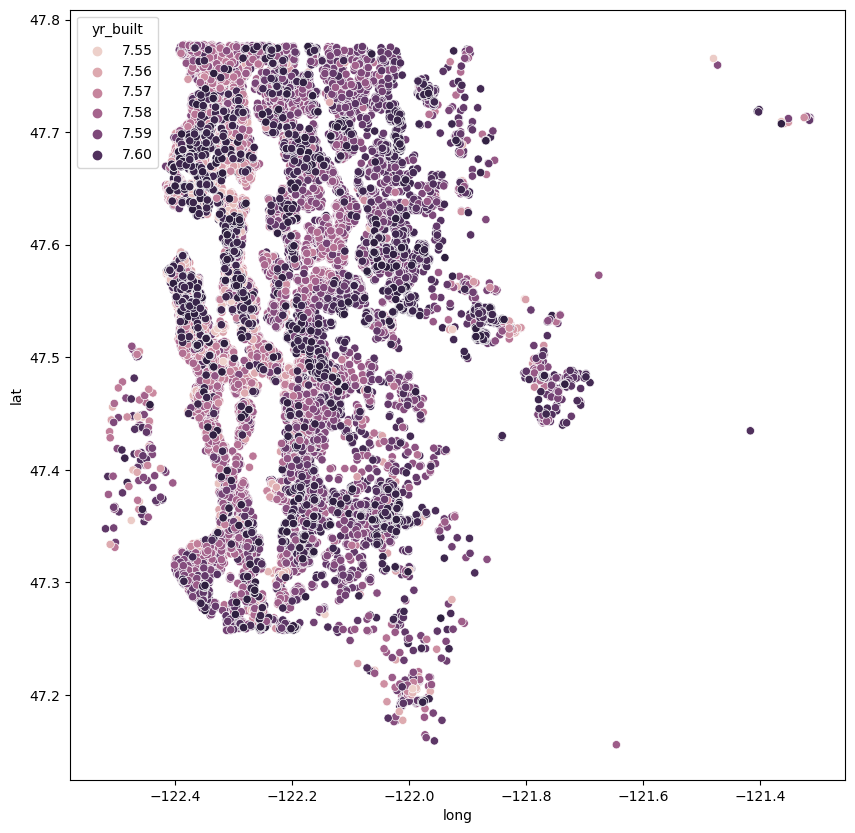

In [23]:
# Distribuição geográfica das casas conforme o ano de construção
plt.figure(figsize=(10,10))
sns.scatterplot(x = df_houses['long'], y = df_houses['lat'], 
                hue=np.log(df_houses['yr_built']));
plt.show()

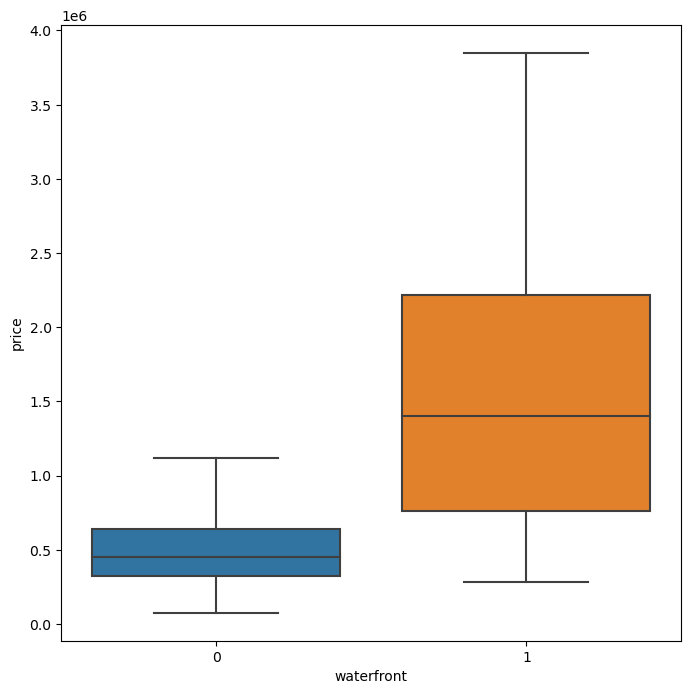

In [24]:
# Impacto de estar em frente à água no preço de venda
plt.figure(figsize=(8,8))
sns.boxplot(x='waterfront', y='price', data=df_houses, showfliers=False)
plt.show()


Constatamos que estar em frente à água aumenta consideravelmente o preço de venda.

In [25]:
# Medindo e testando correlações
df_houses.corr()['price'].sort_values(ascending=True)

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

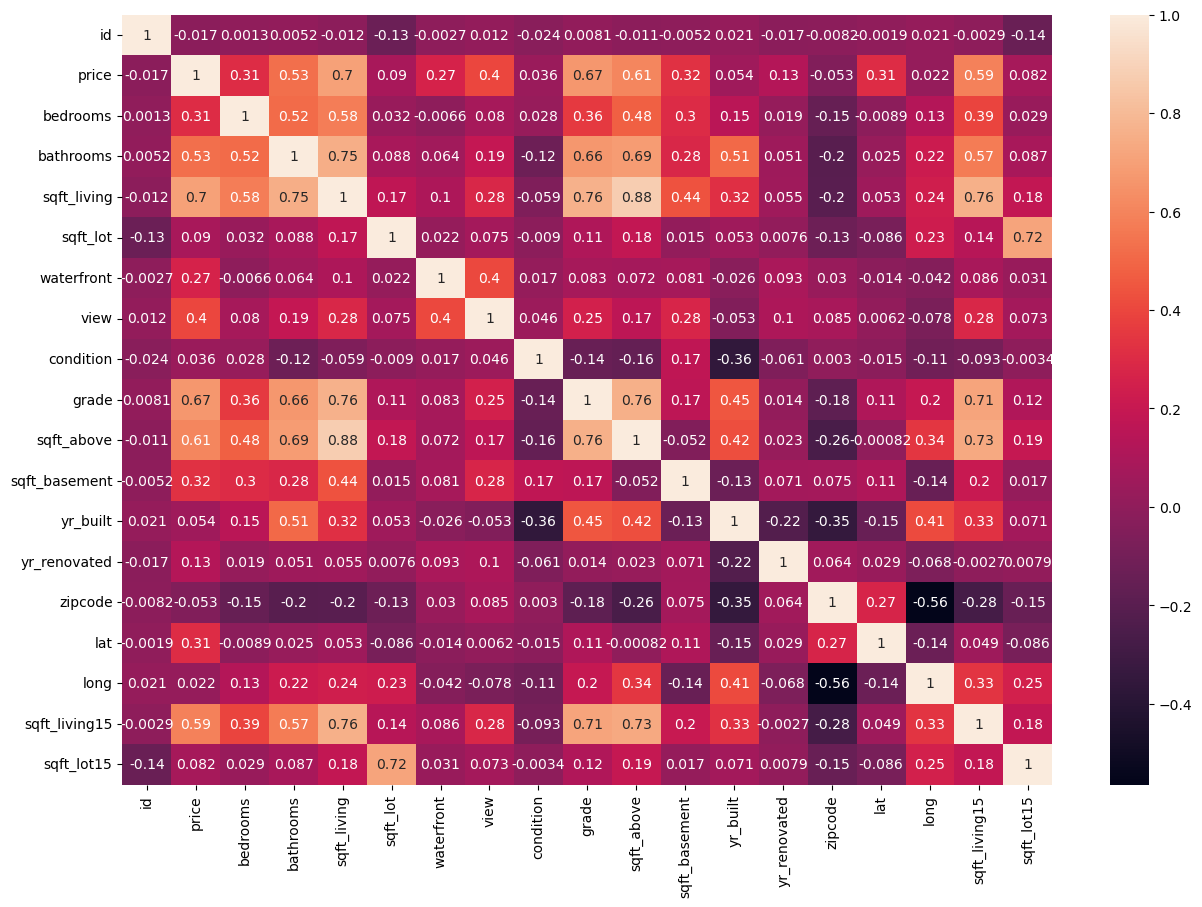

In [26]:
# Matriz de Correlação
plt.figure(figsize=(15,10))
sns.heatmap(df_houses.corr(), annot=True)
plt.show()